# Reto 02
**_Dr. Antonio Arista Jalife_**

Este reto consiste en agrandar la librería de MLUtilites.py para crear poco a poco un sistema de recomendaciones. Primero hemos de crear una función que separe datos.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#### Separación de datos
Esta función separa datos dependiendo de la etiqueta de valor esperado que tengan

In [3]:
def separarDatos(muestras, valoresEsperados, valorAFiltrar):
    indices = np.where(valoresEsperados == valorAFiltrar)
    return muestras[indices], valoresEsperados[indices]

Prueba de la separación de datos

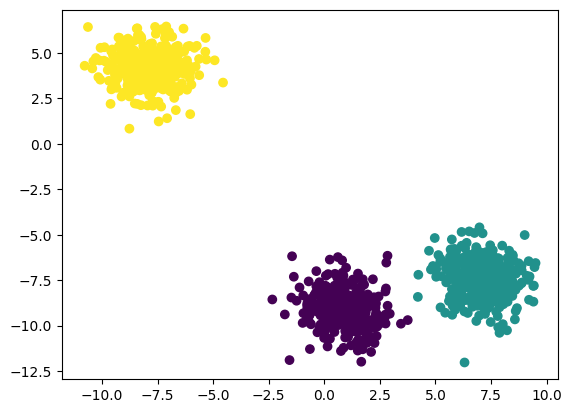

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [4]:
x, y = make_blobs(n_samples=1000, centers=3, n_features=2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

muestrasCon1, valoresEsperadosCon1 = separarDatos(x,y,1)
print(valoresEsperadosCon1)

In [5]:
import MLUtilities as utils
from scipy import stats

### Código para obtener moda
(Extraído del ejemplo 01 / ayuda para el reto 02)

In [6]:
def obtenerModa(resultados):
    moda = (stats.mode(resultados)[0]).reshape(-1)
    return moda[0]

### Código para obtener la accuracy de una muestra con K medias
Este código primero extrae el numero de muestras, luego los resultados de clasificación, luego la moda y busca con np.where donde los resultados son diferentes a la moda, esos son los indices de errores.

Luego entonces, la cantidad de errores es el tamaño de los resultados donde los indicesErrores apuntan.
finalmente, la Accuracy la calculamos como:

$accuracy = \frac{numMuestras - cantidadErrores}{numMuestras} \times 100 $

In [7]:
def obtenerAccuracy_kmedias(muestras, centroides):
    numMuestras = muestras.shape[0]
    
    resultados = utils.clasificarPorCentroides(muestras, centroides)
    moda = obtenerModa(resultados)
    
    indicesErrores = np.where(resultados != moda)
    cantidadErrores = len(resultados[indicesErrores])
    accuracy = ((numMuestras - cantidadErrores) / numMuestras) *100
    return accuracy

#### Prueba de la función de obtener Accuracy
Para ello, observa el scatter plot de arriba, y elige los centroides manualmente con "centroidesDummy".
si pones el centroide dummy 1 y 2 muy cerca, la accuracy va a bajar considerablemente.
si pones el centroide dummy 1 enmedio de una clase, y el centroide 2 muy lejos, la accuracy será de 100%

In [8]:
centroidesDummy = np.array([[-4,-9]       #Centroide dummy 1
                            ,[-5,-10]])   #Centroide dummy 2
accuracy = obtenerAccuracy_kmedias(muestrasCon1,centroidesDummy)
print(accuracy)

100.0
